# STA130 Week 03 Homework

# "Pre-lecture" HW

## 1

First, I'll plot histograms of flipper_length_mm for each species in the penguins dataset using Plotly. Then, I'll mark the mean and median of flipper_length_mm for each species using fig.add_vline() since they're vertical lines on the x-axis.

Next, I'll mark the scale. For the range, I'll use fig.add_vrect() to highlight the minimum and maximum values. For the interquartile range (IQR), I'll use add_vrect() again, covering the 25th to the 75th percentile.

Finally, I'll highlight the range defined by two standard deviations (±2 std dev) from the mean using fig.add_vrect(). Each of these visual markers will help show both the central tendency and spread of flipper_length_mm for each species in the dataset.

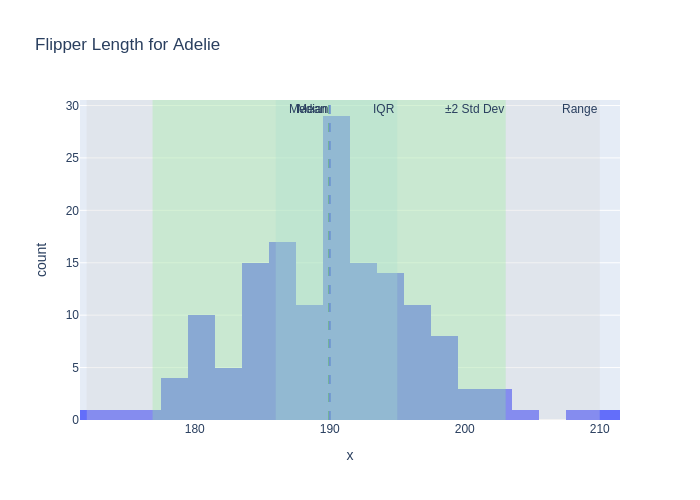

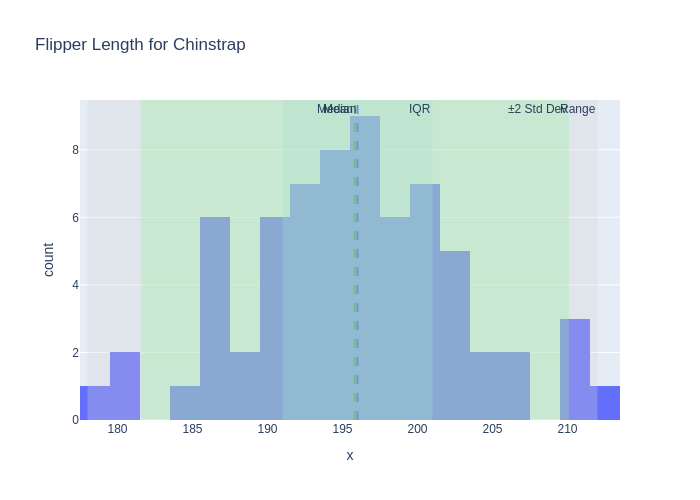

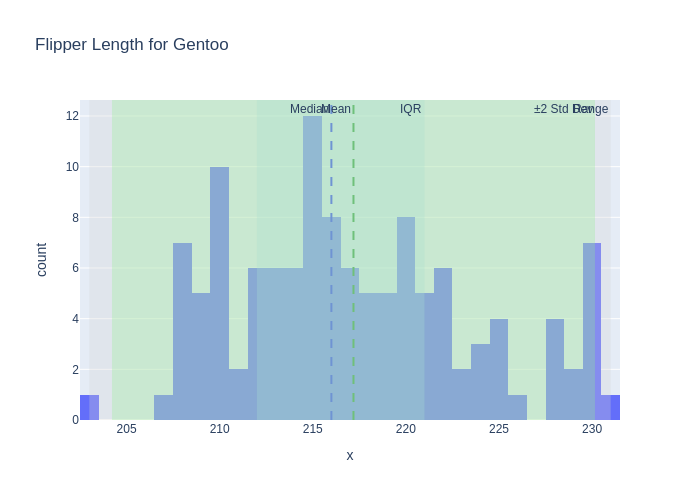

In [49]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Load penguins dataset
penguins = sns.load_dataset('penguins')

# Define a function to create histograms for each species and mark statistics
def plot_histogram_with_annotations(species_name, flipper_length):
    # Create the histogram
    fig = px.histogram(x=flipper_length, nbins=30, title=f'Flipper Length for {species_name}')
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    std = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    range_min, range_max = flipper_length.min(), flipper_length.max()
    
    # ±2 std deviation range
    lower_2std = mean - 2 * std
    upper_2std = mean + 2 * std
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='green', width=2, dash='dash'), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='blue', width=2, dash='dash'), annotation_text="Median", annotation_position="top left")
    
    # Add shaded regions for ranges
    # Full range
    fig.add_vrect(x0=range_min, x1=range_max, fillcolor="lightgrey", opacity=0.3, line_width=0, annotation_text="Range")
    # IQR
    fig.add_vrect(x0=q1, x1=q3, fillcolor="lightblue", opacity=0.3, line_width=0, annotation_text="IQR")
    # ±2 std deviation range
    fig.add_vrect(x0=lower_2std, x1=upper_2std, fillcolor="lightgreen", opacity=0.3, line_width=0, annotation_text="±2 Std Dev")
    
    # Show the plot
    fig.show(renderer="png")

# Filter penguins dataset by species and create histograms
species_list = penguins['species'].unique()

for species in species_list:
    species_data = penguins[penguins['species'] == species]
    flipper_length = species_data['flipper_length_mm'].dropna()  # drop missing values
    plot_histogram_with_annotations(species, flipper_length)



## 2

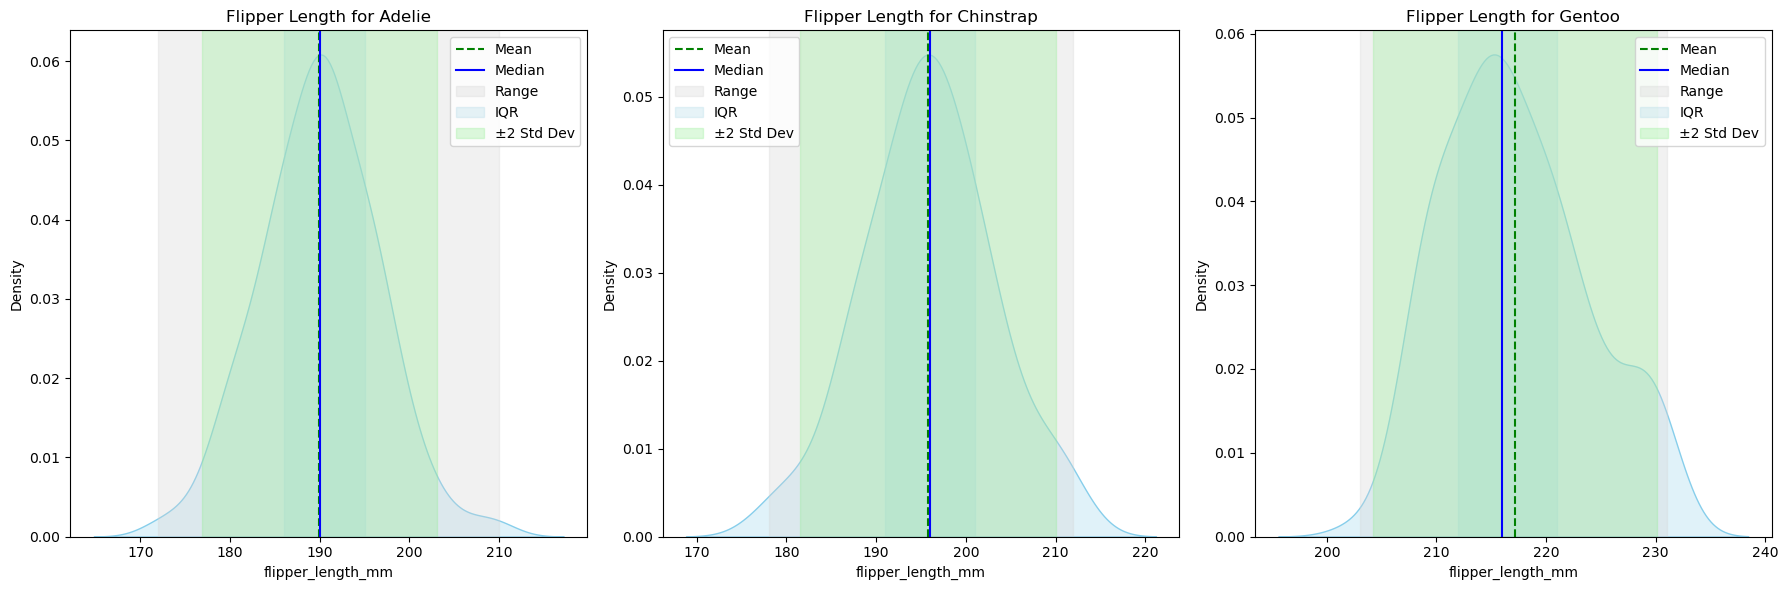

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load penguins dataset
penguins = sns.load_dataset('penguins')

# Define a function to create KDE plots for each species and mark statistics
def plot_kde_with_annotations(ax, species_name, flipper_length):
    # KDE plot
    sns.kdeplot(flipper_length, ax=ax, fill=True, color='skyblue', bw_adjust=1)
    ax.set_title(f'Flipper Length for {species_name}')
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    std = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    range_min, range_max = flipper_length.min(), flipper_length.max()
    
    # ±2 std deviation range
    lower_2std = mean - 2 * std
    upper_2std = mean + 2 * std
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='green', linestyle='--', label='Mean')
    ax.axvline(median, color='blue', linestyle='-', label='Median')
    
    # Add shaded regions for ranges
    ax.axvspan(range_min, range_max, color='lightgrey', alpha=0.3, label='Range')
    ax.axvspan(q1, q3, color='lightblue', alpha=0.3, label='IQR')
    ax.axvspan(lower_2std, upper_2std, color='lightgreen', alpha=0.3, label='±2 Std Dev')
    
    # Add a legend
    ax.legend()

# Filter penguins dataset by species
species_list = penguins['species'].unique()

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each species and plot the KDE with annotations
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    flipper_length = species_data['flipper_length_mm'].dropna()  # Drop missing values
    plot_kde_with_annotations(axes[i], species, flipper_length)

plt.tight_layout()

plt.savefig("flipper_length_kde_plots.png")

plt.show()



## 3

**After looking at some pictures of box plots, histograms, and kernel density estimators, I described to a ChatBot what I thought the contrasting descriptions of these three "data distribution" visualization methods are:**

**It came up with this:**

It sounds like you're explaining the differences between histograms, KDE plots, and box plots, particularly in how they handle and display data distribution.

Here's how I'd restate what you're saying:
A histogram groups the data into bins, and all the values that fall within a bin are lumped together. It doesn't matter whether a value is close to the left, right, or center of the bin—everything within the bin is treated the same.

A KDE plot (Kernel Density Estimate) takes each individual data point and overlays a small Gaussian bell curve on it, which allows the plot to smooth out and give a more continuous estimate of the data's distribution.

A box plot visually summarizes key distribution statistics: the median, the quartiles (25th and 75th percentiles), and the minimum and maximum values (sometimes excluding outliers). It gives a clear sense of the data's spread and central tendency.

This would highlight the distinctions in how these methods represent distribution and summary statistics of the data.


**Then I asked what "pros and cons" these three "data distribution" visualization methods ChatGPT can come up with:**

**1. Histogram**

- Pros:

    Simple and intuitive.
    Great for showing the distribution and frequency of data.
    Easy to compare different groups by overlaying or using side-by-side histograms.

- Cons:

    Choice of bin size affects the visualization significantly—too many bins can make the data look noisy, too few bins can hide important details.
    It doesn't capture precise locations of individual data points within bins.
    Can look blocky or lose detail, especially with small sample sizes.


**2. KDE Plot**

- Pros:

    Provides a smooth, continuous estimate of the data distribution.
    Shows more nuance by taking into account every individual data point and spreading its influence over a small area.
    Flexible: bandwidth can be adjusted for more or less smoothing.

- Cons:

    Sensitive to bandwidth choice—too large a bandwidth oversmooths, while too small a bandwidth introduces noise.
    Less intuitive for people unfamiliar with KDE, as it relies on a probability density approach rather than frequency.
    Doesn't show hard boundaries (e.g., minimum, maximum) like a histogram does.


**3. Box Plot**


- Pros:

    Compact and efficient for summarizing distribution characteristics (median, quartiles, range).
    Great for comparing distributions across multiple categories or groups.
    Shows outliers clearly, highlighting any unusual data points.

- Cons:

    Doesn't display the overall shape of the distribution, unlike histograms or KDE plots (e.g., skewness, modality).
    Limited detail for large, complex datasets (doesn't show frequency or specific values).
    The placement of data within the quartiles is not clear (e.g., whether the data is clustered or spread out within each quartile).

Personally, I think that KDE are my preferred data visualization, this is because KDE plots offer a smooth, continuous distribution which are nice to look at, while the others could get really messy sometimes.

## 4

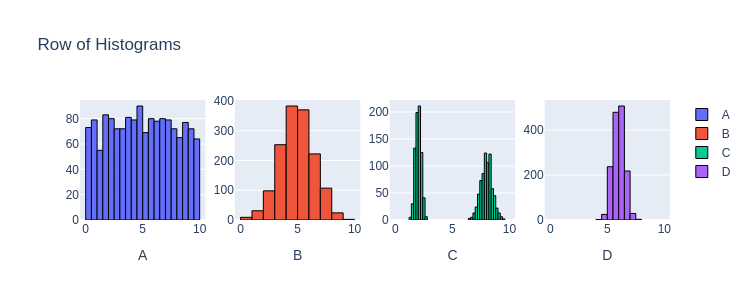

In [57]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")

Similar means and similar variances:

Data B and Data D (means close to 5 and 6, relatively small variances).
Similar means but quite different variances:

Data B and Data D (similar means, but Data B has a larger variance).
Similar variances but quite different means:

Data A and Data D (both have small variances, but different means).
Quite different means and quite different variances:

Data A and Data C (distinct in both mean and variance, with Data C showing bimodal distribution).

**Summary of chat and chat link:**

https://chatgpt.com/share/66f214f5-0800-8013-87a2-5a9bc5f5c248

In this chat, we discussed different ways to visualize data distribution, specifically using **histograms**, **KDE plots**, and **box plots**. You asked how to mark statistical information (like the mean, median, and range) on a histogram, and I explained how to do this using Plotly in Python by adding lines and rectangles to represent the central tendency and spread of the data.

You then explained how histograms and KDE plots handle data differently, and I built on that by creating a "pros and cons" list comparing **histograms**, **KDE plots**, and **box plots**. We covered the strengths and limitations of each method in terms of how they display data distribution and summary statistics.

Would you like to dive deeper into any part of this?

# "Post-lecture" HW

## 5.

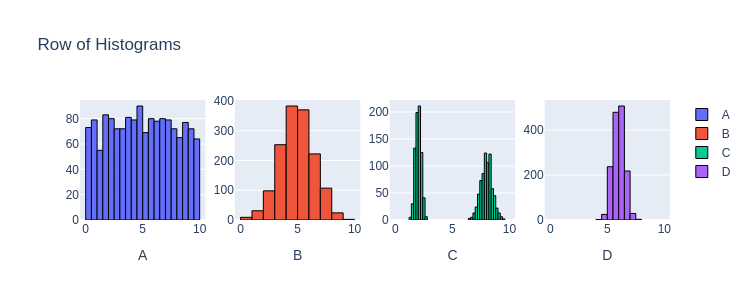

In [58]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

plt.show()
fig.show(renderer="png")

### **Skewness describes the asymmetry of the distribution of data. When distributions are not symmetric, the mean and median can differ.**

**Right-skewed (positive skew)**

- In a right-skewed distribution, the tail is longer on the right side.

- The mean is typically greater than the median because the larger values pull the mean to the right, while the median remains closer to the center of the distribution.

- Example: Incomes in a population often exhibit right skewness because a few people earn significantly more than the majority, shifting the mean higher.

**Left-skewed (negative skew)**

- In a left-skewed distribution, the tail is longer on the left side.

- The mean is typically less than the median because the smaller values pull the mean to the left.

- Example: Exam scores where most students perform well, but a few perform poorly, might have a left-skewed distribution.

### **Then I asked the chatbot to explain the code step by step:**

**Imports Required Libraries used were:**

`scipy.stats`: For generating random variables and statistical functions.

`pandas`: For handling data frames.

`numpy`: For numerical operations.


**To Generate Right-Skewed Sample, they used:**

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

**To see the distribution, the code used:**

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

**Calculate Mean and Median:**

sample1.mean()

np.quantile(sample1, [0.5]) # median

**Generate Left-Skewed Sample was done using:**

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

## 6

### Firstly, I found the wine quality dataset:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

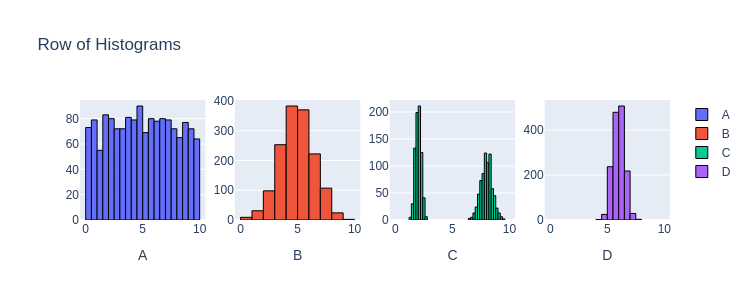

In [59]:
# Load Wine Quality dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality = pd.read_csv(url, sep=';')

# Display the first few rows
print(wine_quality.head())

fig.show(renderer="png")
plt.show()

### Then I tried to generate a visualizer for the dataset using the different types we learnt:

/tmp/ipykernel_70/4079708316.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




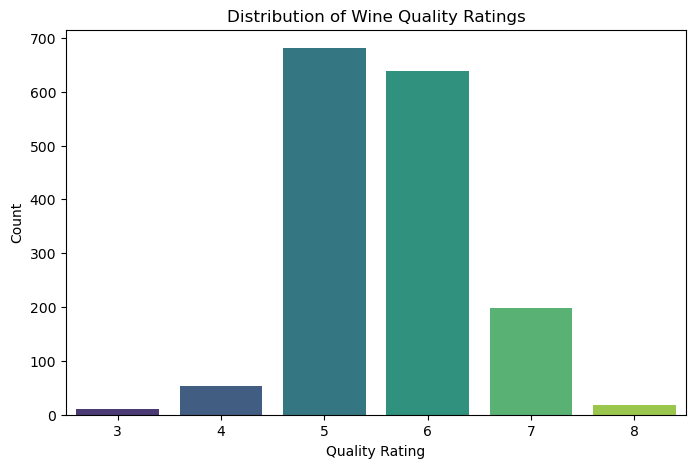

/tmp/ipykernel_70/4079708316.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




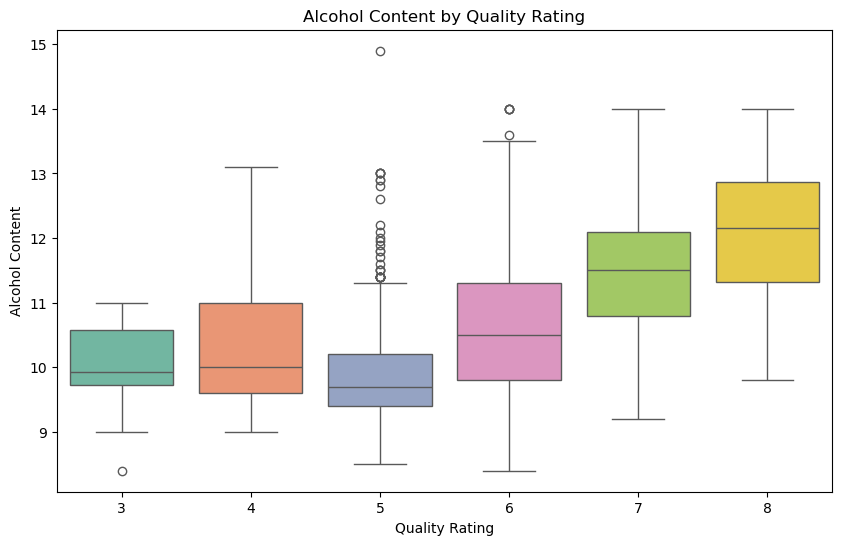

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality = pd.read_csv(url, sep=';')

# Distribution of Wine Quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=wine_quality, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()

# Boxplot of Alcohol Content by Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_quality, palette='Set2')
plt.title('Alcohol Content by Quality Rating')
plt.xlabel('Quality Rating')
plt.ylabel('Alcohol Content')
plt.show()



fig.show(renderer="png")
plt.show()


## 7

### After watching the classic Gapminder Video, I looked at the plotly versions and tried to recreate some of the animation shown

**The video was very hard to generate, but after learning from ChatGPT this is what I got:**

In [42]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
gapminder = pd.read_csv(url)

print(gapminder.head())

import plotly.express as px

fig = px.scatter(
    gapminder,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True, 
    size_max=60,
    title="Gapminder: GDP per Capita vs Life Expectancy",
    labels={"gdpPercap": "GDP per Capita", "lifeExp": "Life Expectancy"},
)

fig.show(renderer="png")
plt.show()

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


## 8

I provided a second version of the figure from the previous problem

In [ ]:
import pandas as pd
import plotly.express as px

# Sample data creation for demonstration
data = {
    "year": [2000, 2000, 2000, 2001, 2001, 2001],
    "percent change": [-0.004, 0.002, 0.001, -0.003, 0.004, 0.005],
    "rank": [1, 2, 3, 1, 2, 3],
    "percent": [20, 30, 40, 25, 35, 45],
    "sex": ["Male", "Female", "Female", "Male", "Female", "Male"],
    "name": ["A", "B", "C", "A", "B", "C"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the animated scatter plot
fig = px.scatter(
    df,
    x="percent change",
    y="rank",
    size="percent",
    color="sex",
    animation_frame="year",
    animation_group="name",
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]
)

# Show the plot
fig.show()
fig.show(renderer="png")

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y 

fig.show(renderer="png")

## 9

Yes, I have.

### Summary of Chat:

https://chatgpt.com/share/66f21a36-b42c-8013-b41d-4641e4425cc1

Here’s a summary of our chat:

General Relationship Between Mean, Median, and Skewness:

We discussed how the mean and median relate to right and left skewness in distributions. In right-skewed distributions, the mean is typically greater than the median, while in left-skewed distributions, the mean is usually less than the median.
Code Explanation:

We explored a piece of Python code that generates right and left-skewed samples using the Gamma distribution, visualizes them, and calculates their mean and median.
Interesting Datasets:

I provided several interesting datasets for analysis, including the Titanic, Iris, Wine Quality, World Happiness Report, and Boston Housing datasets, along with example code for visualizations.
Wine Quality Dataset Analysis:

We performed an analysis of the Wine Quality dataset using summary statistics and visualizations. Key findings included the distribution of wine quality ratings, the relationship between alcohol content and quality, and a correlation heatmap.
Creating Gapminder-style Animations with Plotly:

I explained how to recreate Gapminder-style animations using Plotly, including loading the Gapminder dataset and creating an animated scatter plot to visualize GDP per capita vs. life expectancy.
You also requested a modified version of the animated scatter plot using different parameters, which I provided with corresponding code.
Let me know if you need any more details or if there's anything else you'd like to discuss!